<center><img src="ignaz_semmelweis_1860_small.jpeg"></center>

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on **June 1st, 1847**, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths.

The data is stored as two CSV files within the `data` folder.

`data/yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`data/monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [2]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline  # Thêm dòng này để hiển thị trong Jupyter notebook

Code này sẽ:
Đọc dữ liệu từ cả hai file CSV
Tính toán tỷ lệ tử vong bằng cách chia số ca tử vong cho số ca sinh
Tạo biểu đồ đường để so sánh tỷ lệ tử vong giữa hai phòng khám theo thời gian
Biểu đồ này sẽ giúp chúng ta thấy được sự khác biệt về tỷ lệ tử vong giữa hai phòng khám trước khi Dr. Semmelweis áp dụng quy định rửa tay vào năm 1847.
Bạn có muốn tiếp tục phân tích sâu hơn về dữ liệu hàng tháng không?

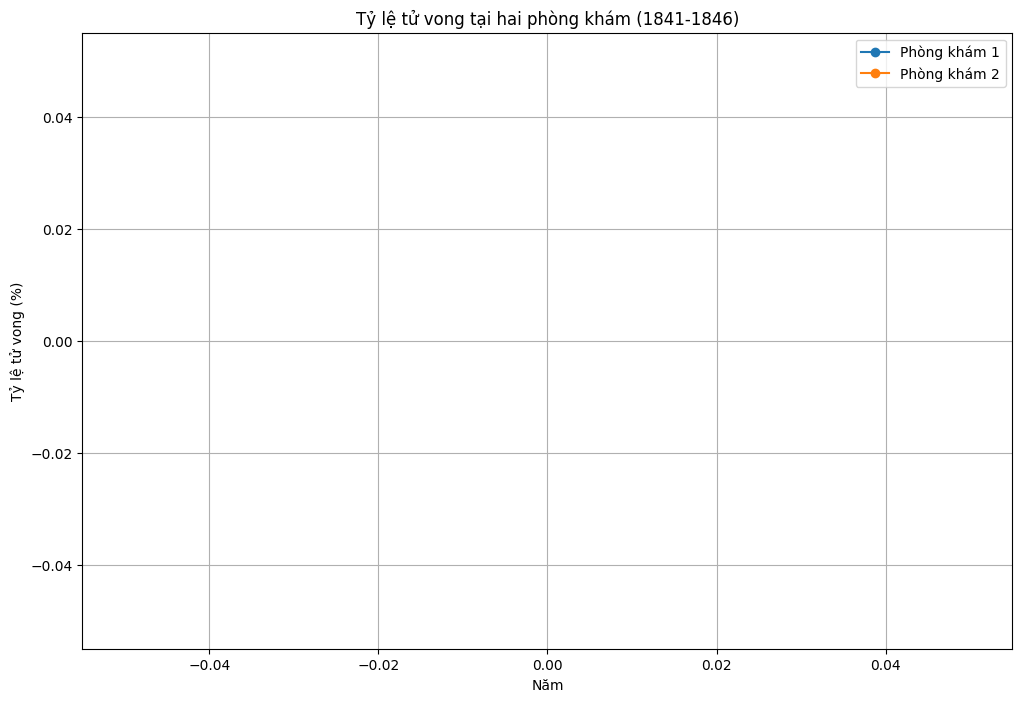

In [3]:
# Đọc dữ liệu từ các file CSV
yearly_deaths = pd.read_csv('data/yearly_deaths_by_clinic.csv')
monthly_deaths = pd.read_csv('data/monthly_deaths.csv')

# Tính tỷ lệ tử vong (số ca tử vong/số ca sinh)
yearly_deaths['death_rate'] = yearly_deaths['deaths'] / yearly_deaths['births'] * 100

# Vẽ biểu đồ so sánh tỷ lệ tử vong giữa 2 phòng khám
plt.figure(figsize=(12, 8))
for clinic in [1, 2]:
    clinic_data = yearly_deaths[yearly_deaths['clinic'] == f'Clinic {clinic}']
    plt.plot(clinic_data['year'], clinic_data['death_rate'], 
             label=f'Phòng khám {clinic}', marker='o')

plt.title('Tỷ lệ tử vong tại hai phòng khám (1841-1846)')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ tử vong (%)')
plt.legend()
plt.grid(True)

In [4]:
# Kiểm tra dữ liệu
print("Dữ liệu yearly_deaths:")
print(yearly_deaths.head())
print("\nDữ liệu monthly_deaths:")
print(monthly_deaths.head())

Dữ liệu yearly_deaths:
   year  births  deaths    clinic  death_rate
0  1841    3036     237  clinic 1    7.806324
1  1842    3287     518  clinic 1   15.759051
2  1843    3060     274  clinic 1    8.954248
3  1844    3157     260  clinic 1    8.235667
4  1845    3492     241  clinic 1    6.901489

Dữ liệu monthly_deaths:
         date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2


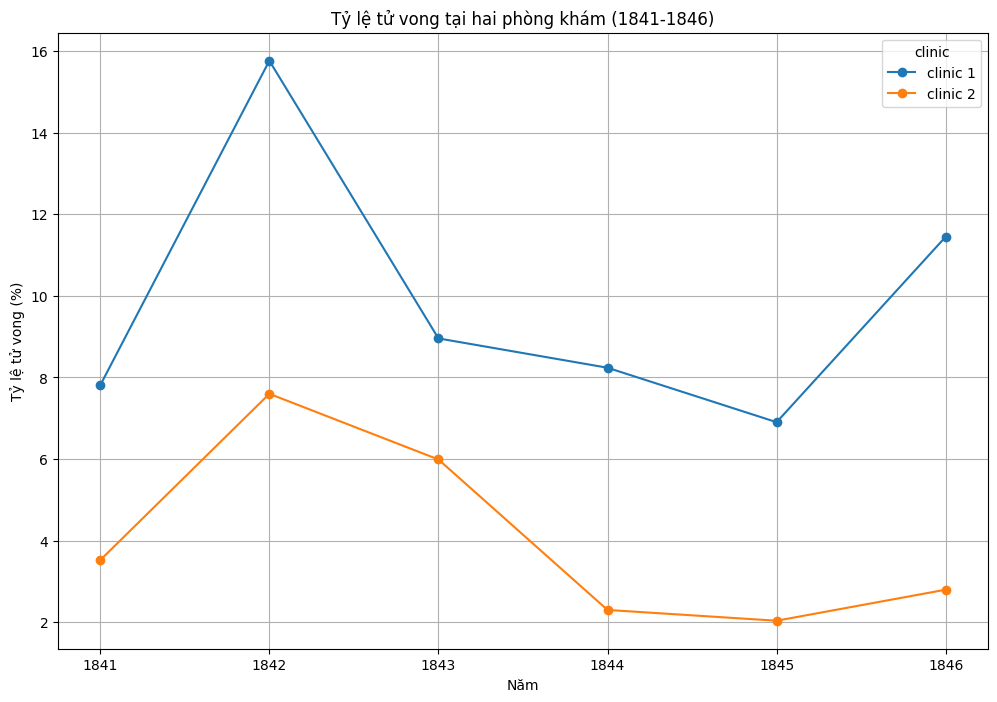

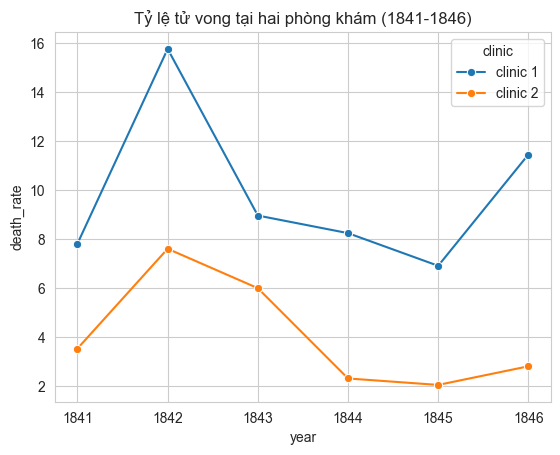

In [5]:
# Cách 1: Sử dụng phương thức plot của pandas
yearly_deaths.pivot(index='year', columns='clinic', values='death_rate').plot(
    figsize=(12, 8),
    marker='o',
    title='Tỷ lệ tử vong tại hai phòng khám (1841-1846)'
)
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ tử vong (%)')
plt.grid(True)
plt.show()

# Cách 2: Sử dụng seaborn (nếu có thể)
import seaborn as sns
sns.set_style("whitegrid")
sns.lineplot(data=yearly_deaths, x='year', y='death_rate', hue='clinic', marker='o')
plt.title('Tỷ lệ tử vong tại hai phòng khám (1841-1846)')
plt.show()

Từ đồ thị, chúng ta có thể đưa ra các nhận xét quan trọng về tỷ lệ tử vong như sau:
1. Sự chênh lệch rõ rệt giữa hai phòng khám:
Phòng khám 1 có tỷ lệ tử vong cao hơn nhiều, dao động từ 6-15%
Phòng khám 2 có tỷ lệ tử vong thấp hơn đáng kể, chỉ khoảng 2-5%
2. Diễn biến theo thời gian:
Năm 1842: Phòng khám 1 đạt đỉnh điểm với tỷ lệ tử vong khoảng 15%
Năm 1844-1846: Tỷ lệ tử vong ở Phòng khám 1 có xu hướng giảm nhưng vẫn cao hơn nhiều so với Phòng khám 2
Điểm bất thường:
Sự chênh lệch lớn giữa hai phòng khám là bất thường vì cùng nằm trong một bệnh viện
Phòng khám 1 (nơi các bác sĩ làm việc) có tỷ lệ tử vong cao hơn gấp 2-3 lần so với Phòng khám 2 (nơi các nữ hộ sinh làm việc)
Ý nghĩa:
Sự chênh lệch này sau này được Dr. Semmelweis giải thích là do các bác sĩ ở Phòng khám 1 thường xuyên thực hiện khám nghiệm tử thi trước khi đỡ đẻ mà không rửa tay
Phát hiện này dẫn đến việc áp dụng quy định rửa tay bắt buộc vào tháng 6/1847
Những số liệu này đã góp phần quan trọng trong việc chứng minh tầm quan trọng của vệ sinh tay trong y tế, mặc dù vào thời điểm đó người ta chưa biết đến sự tồn tại của vi khuẩn.

   handwashing_started  mean_proportion_deaths
0                False                0.105050
1                 True                0.021093
0.025   -0.101688
0.975   -0.067393
dtype: float64


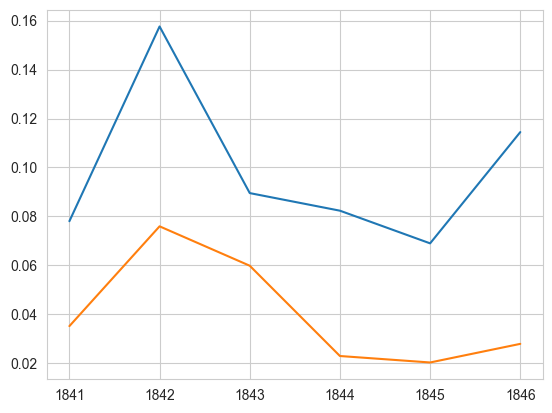

In [6]:
# What year had the highest yearly proportion of deaths at each clinic?
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt

# What year had the highest yearly proportion of deaths at each clinic?

# Load and inspect the yearly data
yearly = pd.read_csv('data/yearly_deaths_by_clinic.csv')
yearly.head()

# Add proportion_deaths to the DataFrames
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

# Plot the year versus proportion deaths and separate by clinic using a for loop
# You may prefer to identify the year without using a visualization, that's fine too!
for clinic in yearly['clinic'].unique():
    clinic_data = yearly[yearly['clinic'] == clinic]
    plt.plot(clinic_data['year'], clinic_data['proportion_deaths'], label=clinic)

# This code is optional but makes your visualization look neater and  readable
# plt.xlabel('Year')
# plt.ylabel('Proportion of Deaths')
# plt.title('Year vs Proportion of Deaths by Clinic')
# plt.legend(title='Clinic')
# plt.grid(True)
# plt.show()

# Identify the highest year in the visualization and save the integer year
highest_year = 1842

# What are the mean proportions of deaths before and after handwashing from the monthly data?
# Load and inspect the monthly data
monthly = pd.read_csv("data/monthly_deaths.csv")
monthly.head()

# Add proportion_deaths to the DataFrame
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

# Add the threshold as the date handwashing was introduced
handwashing_start = '1847-06-01'

# Create a boolean column that shows True after the date handwashing was introduced
monthly['handwashing_started'] = monthly['date'] >= handwashing_start

# Group by the new boolean column calculate the mean proportion of deaths
# Reset the index to store the result as a DataFrame
monthly_summary = monthly.groupby('handwashing_started').agg(
    mean_proportion_deaths=('proportion_deaths', 'mean')
).reset_index()

print(monthly_summary)

# Analyze the difference in the mean monthly proportion of deaths and calculate a 95% confidence interval

# Split the monthly data into before and after handwashing was introduced
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]

# Perform a bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculate a 95% confidence interval
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)